In [1]:
import os
import pandas as pd  
import warnings      
import numpy as np  
import matplotlib.pyplot as plt  
import math as mt

folder_path = 'C:/Users/T/Desktop/GitHub/Pol_Index_Forecast/FSIpred/oridata'
files = os.listdir(folder_path)
files

['fsi-2006.xlsx',
 'fsi-2007.xlsx',
 'fsi-2008.xlsx',
 'fsi-2009.xlsx',
 'fsi-2010.xlsx',
 'fsi-2011.xlsx',
 'fsi-2012.xlsx',
 'fsi-2013.xlsx',
 'fsi-2014.xlsx',
 'fsi-2015.xlsx',
 'fsi-2016.xlsx',
 'fsi-2017.xlsx',
 'fsi-2018.xlsx',
 'fsi-2019.xlsx',
 'fsi-2020.xlsx',
 'fsi-2021.xlsx',
 'fsi-2022-download.xlsx',
 'FSI-2023-DOWNLOAD.xlsx']

In [2]:
# 1. data preparation
FSIdata = pd.DataFrame()

# 1.1 merge data sheets
# read the "country" and "total" cols from the first file and rename the "totol" col using the 5th-8th chars in file name 
first_file = folder_path + '/'+ files[0]
FSIdata['Country'] = pd.read_excel(first_file, usecols = ['Country'])['Country']
FSIdata[files[0][4:8]] = pd.read_excel(first_file, usecols = ['Total'])['Total']

# read the "total" col from the others and append to the FSIdata
for file in files[1:]:
    column_data = pd.read_excel(folder_path + '/'+ file, usecols = ['Country','Total'])[['Country','Total']]
    column_data.rename(columns = {'Total':file[4:8]}, inplace = True)
    FSIdata = pd.merge(FSIdata, column_data, how = 'outer', on = 'Country')

# result    
warnings.filterwarnings('ignore')
FSIdata

,Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Sudan,112.3,113.7,113.0,112.4,111.8,108.7,109.4,111.0,110.1,110.8,111.5,110.6,108.663194,108.0,104.765885,105.2,107.1,106.2
1,Congo Democratic Republic,110.1,105.5,106.7,108.7,109.9,108.2,111.2,111.9,110.2,109.7,110.0,110.0,110.670365,110.2,109.394621,108.4,107.3,107.2
2,Cote d'Ivoire,109.2,107.3,104.6,102.5,101.2,102.8,103.6,103.5,101.7,100.1,97.9,96.5,94.561519,92.1,89.722674,90.7,NaN,87.1
3,Iraq,109.0,111.4,110.6,108.6,107.3,104.8,104.3,103.9,102.2,104.4,104.7,105.4,102.205685,99.1,95.941170,96.2,93.8,91.4
4,Zimbabwe,108.9,110.1,112.5,114.0,110.2,107.9,106.3,105.2,102.8,100.0,100.5,101.6,102.293753,99.5,99.220857,99.1,97.8,96.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,North Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.5,62.6,NaN
227,Cabo Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.2,61.4,NaN
228,Israel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,42.6,44.1
229,Slovakia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,37.1,NaN


In [3]:
# 1.2 filter by selected countries
selected_countries = FSIdata.loc[FSIdata['Country'].isin(['China','United States','Japan'])]
selected_countries = selected_countries.set_index('Country').T

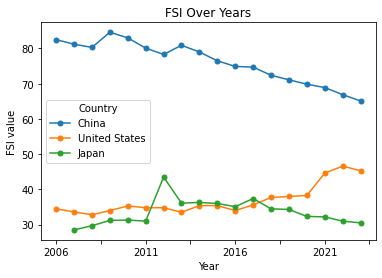

In [4]:
# visualization of selected countries
selected_countries.plot(kind = 'line', marker = 'o', markersize = 5)

plt.title("FSI Over Years")
plt.xlabel('Year')
plt.ylabel('FSI value')
plt.legend(title = 'Country')

plt.show()

In [5]:
# 2. FSI prediction, an example of the U.S.
# 2.1 create the new 1-AGO sequence X(1)
X0 = selected_countries['United States'].tolist()      # original sequence
X1 = [X0[0]]         
add = X0[0] + X0[1]  
X1.append(add)       

i = 2
while i < len(X0):
    add = add + X0[i]
    X1.append(add)
    i += 1 
print("X(1) sequence:", X1) # 1-AGO(Accumulating Generation Operator) sequence

X(1) sequence: [34.5, 68.1, 100.89999999999999, 134.89999999999998, 170.2, 205.0, 239.8, 273.3, 308.7, 344.09999999999997, 378.09999999999997, 413.7, 451.4, 489.4, 527.6727582781865, 572.2727582781865, 618.8727582781866, 664.1727582781865]


In [6]:
# 2.2 create the mean generation of consecutive neighbors sequence of X(1)
M = []
j = 1
while j < len(X1):
    num = (X1[j] + X1[j - 1]) / 2
    M.append(num) 
    j = j + 1
print("Mean values of X(1) series：", M)

Mean values of X(1) series： [51.3, 84.5, 117.89999999999998, 152.54999999999998, 187.6, 222.4, 256.55, 291.0, 326.4, 361.09999999999997, 395.9, 432.54999999999995, 470.4, 508.53637913909324, 549.9727582781866, 595.5727582781865, 641.5227582781865]


In [7]:
# 2.3 the least square method of GM(1,1) model
# 2.3.1 create matrix Y using X(0)[1`17] 
Y = []
x_i = 0
while x_i < len(X0) - 1:
    x_i += 1
    Y.append(X0[x_i])

Y = np.mat(Y).T  # transpose y
Y.reshape(-1, 1) # make y a 1-col matrix
print("Matrix Y:", Y)

Matrix Y: [[33.6       ]
 [32.8       ]
 [34.        ]
 [35.3       ]
 [34.8       ]
 [34.8       ]
 [33.5       ]
 [35.4       ]
 [35.4       ]
 [34.        ]
 [35.6       ]
 [37.7       ]
 [38.        ]
 [38.27275828]
 [44.6       ]
 [46.6       ]
 [45.3       ]]


In [8]:
# 2.3.2 create matrix B
# create M_neg using negative values of matrix M
M_neg = []
M_i = 0
while M_i < len(M):
    M_neg.append(-M[M_i])
    M_i += 1

M_neg = np.mat(M_neg).T # 创建矩阵Y并转置
M_neg.reshape(-1, 1)
print("Matrix by neg values of M:", M_neg)

# create matrix B
one_col_array = np.ones((len(M_neg), 1))  # values = 1,（17，1）array
B = np.hstack((M_neg, one_col_array))  # stack arrays, horizontally
print("One Col Array:", one_col_array)
print("B:", B)

Matrix by neg values of M: [[ -51.3       ]
 [ -84.5       ]
 [-117.9       ]
 [-152.55      ]
 [-187.6       ]
 [-222.4       ]
 [-256.55      ]
 [-291.        ]
 [-326.4       ]
 [-361.1       ]
 [-395.9       ]
 [-432.55      ]
 [-470.4       ]
 [-508.53637914]
 [-549.97275828]
 [-595.57275828]
 [-641.52275828]]
One Col Array: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
B: [[ -51.3           1.        ]
 [ -84.5           1.        ]
 [-117.9           1.        ]
 [-152.55          1.        ]
 [-187.6           1.        ]
 [-222.4           1.        ]
 [-256.55          1.        ]
 [-291.            1.        ]
 [-326.4           1.        ]
 [-361.1           1.        ]
 [-395.9           1.        ]
 [-432.55          1.        ]
 [-470.4           1.        ]
 [-508.53637914    1.        ]
 [-549.97275828    1.        ]
 [-595.57275828    1.        ]
 [-641.52275828    1.        ]]


In [9]:
# 2.3.3 calculate parameters a and b using the least square method
beta = np.linalg.inv(B.T.dot(B)).dot(B.T).dot(Y)   # sequence of parameters
a = beta[0]
b = beta[1]
const = b / a
print(beta)
print(type(beta))

[[-2.02258100e-02]
 [ 3.03225175e+01]]
<class 'numpy.matrix'>


In [10]:
# 2.3.4 prediction in 2006 - 2030 
F = [X0[0]]
k = 1
while k < len(X0) + 7:
    F.append((X0[0] - const) * mt.exp(-a * k) + const)
    k += 1
print("Forecast result - cummulated:", F)

Forecast result - cummulated: [34.5, matrix([[65.83613909]]), matrix([[97.81252996]]), matrix([[130.44225405]]), matrix([[163.73866011]]), matrix([[197.7153696]]), matrix([[232.38628231]]), matrix([[267.76558201]]), matrix([[303.86774228]]), matrix([[340.70753242]]), matrix([[378.30002349]]), matrix([[416.66059447]]), matrix([[455.80493858]]), matrix([[495.74906966]]), matrix([[536.50932874]]), matrix([[578.10239074]]), matrix([[620.54527128]]), matrix([[663.85533362]]), matrix([[708.05029579]]), matrix([[753.14823783]]), matrix([[799.16760919]]), matrix([[846.12723628]]), matrix([[894.04633015]]), matrix([[942.94449437]]), matrix([[992.84173306]])]


In [11]:
# 2.3.5 prediction sequence by years
x_hat = [X0[0]]
g = 1
while g < len(X0) + 7:
    x_hat.append(F[g] - F[g - 1])
    g += 1

X0 = np.array(X0)
x_hat = np.array(x_hat)

print(X0)
print(x_hat)

[34.5        33.6        32.8        34.         35.3        34.8
 34.8        33.5        35.4        35.4        34.         35.6
 37.7        38.         38.27275828 44.6        46.6        45.3       ]
[34.5 matrix([[31.33613909]]) matrix([[31.97639087]])
 matrix([[32.6297241]]) matrix([[33.29640606]]) matrix([[33.97670949]])
 matrix([[34.67091271]]) matrix([[35.3792997]]) matrix([[36.10216027]])
 matrix([[36.83979014]]) matrix([[37.59249107]]) matrix([[38.36057098]])
 matrix([[39.14434411]]) matrix([[39.94413108]]) matrix([[40.76025908]])
 matrix([[41.593062]]) matrix([[42.44288054]]) matrix([[43.31006234]])
 matrix([[44.19496217]]) matrix([[45.09794204]]) matrix([[46.01937136]])
 matrix([[46.95962709]]) matrix([[47.91909387]]) matrix([[48.89816422]])
 matrix([[49.89723869]])]


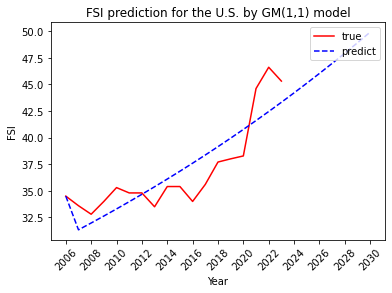

In [12]:
# 2.3.6 visualize the real vs the prediction 

t1 = range(2006, 2024) # t of the real 
t2 = range(2006, 2031) # t of the prediction 

# line graph
plt.plot(t1, X0, color='r', linestyle="-", label='true')
plt.plot(t2, x_hat, color='b', linestyle="--", label="predict")
plt.xticks(range(2006,2031,2),rotation = 45)
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('FSI')
plt.title('FSI prediction for the U.S. by GM(1,1) model')

plt.show()

In [13]:
# 2.3.7 evaluation 

# test data frame
for ind in range(1,len(x_hat)):
    x_hat[ind] = x_hat[ind][0,0] # matrix[0,0] extracting data

final_df = pd.DataFrame({'Predict':x_hat[:18]})
final_df['Year'] = 0
final_df['Real'] = 0
index = 0
initial_year = 2006

while (index < 18):
    final_df['Year'][index] = initial_year
    final_df['Real'] = final_df['Real'].astype(np.float64)
    final_df['Real'][index] = X0[index]
    final_df['Relative Error']=(final_df['Predict']-final_df['Real'])/final_df['Real']
    index += 1
    initial_year += 1

final_df = final_df[['Year','Real','Predict','Relative Error']]
final_df

,Year,Real,Predict,Relative Error
0,2006,34.500000,34.5,0.0
1,2007,33.600000,31.336139,-0.067377
2,2008,32.800000,31.976391,-0.02511
3,2009,34.000000,32.629724,-0.040302
4,2010,35.300000,33.296406,-0.056759
5,2011,34.800000,33.976709,-0.023658
6,2012,34.800000,34.670913,-0.003709
7,2013,33.500000,35.3793,0.056098
8,2014,35.400000,36.10216,0.019835
9,2015,35.400000,36.83979,0.040672


In [14]:
# errors and R^2
mse = np.sum((final_df['Real'] - final_df['Predict']) ** 2) / len(final_df['Predict'])
rmse = mt.sqrt(mse)
mae = np.sum(np.absolute(final_df['Real'] - final_df['Predict'])) / len(final_df['Predict'])
mre = final_df['Relative Error'].mean()
r2 = 1-mse/ np.var(final_df['Predict'])

print("Mean Square Error:",mse)
print("Root Mean Square Error:",rmse)
print("Mean Absolute Error:",mae)
print("Mean Relative Error:",mre)
print("R-Square:",r2)

Mean Square Error: 4.519503114256705
Root Mean Square Error: 2.125912301638218
Mean Absolute Error: 1.8232222754565224
Mean Relative Error: 0.0020447838057153444
R-Square: 0.6527846258294574
